# Heartdisease prediction

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Stats
from scipy import stats
from scipy.stats import fisher_exact


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [47]:
#https://www.kaggle.com/code/georgyzubkov/heart-disease-exploratory-data-analysis

In [48]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [49]:
df.size

5756310

In [50]:
df.shape

(319795, 18)

In [51]:
df.isna().sum()
# df.duplicated().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [53]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,27373.000000,27373.000000,27373.000000,27373.000000
mean,29.401592,7.808242,4.641764,7.136156
std,6.577151,11.487819,9.171932,1.780863
min,12.210000,0.000000,0.000000,1.000000
25%,25.060000,0.000000,0.000000,6.000000
50%,28.340000,0.000000,0.000000,7.000000
75%,32.690000,15.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,292422.000000,292422.000000,292422.000000,292422.000000
mean,28.224658,2.956416,3.828778,7.093416
std,6.325660,7.400378,7.828079,1.399331
min,12.020000,0.000000,0.000000,1.000000
25%,23.890000,0.000000,0.000000,6.000000
50%,27.260000,0.000000,0.000000,7.000000
75%,31.320000,1.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


<AxesSubplot:ylabel='HeartDisease'>

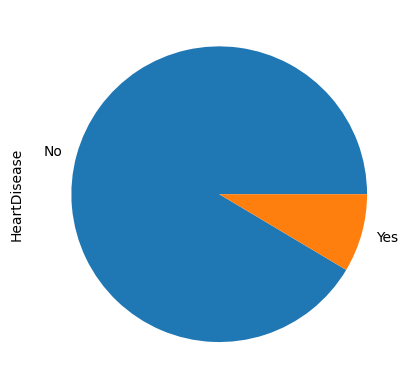

In [54]:
df_heart_disease = df[df['HeartDisease']=='Yes']
df_no_heart_disease = df[df['HeartDisease']=='No']
display(df_heart_disease.describe(), df_no_heart_disease.describe(), df.HeartDisease.value_counts().plot.pie())

In [55]:
#values based on the official WHO categories 

def BMI_based_health_state(BMI):
    bmi_categories = {
        (float('-inf'), 18.5): "Underweight",
        (18.5, 24.9): "Normal weight",
        (25, 30): "Overweight",
        (30, float('inf')): "Obesity"
    }

    for range_limits, category in bmi_categories.items():
        lower_limit, upper_limit = range_limits
        if lower_limit <= BMI < upper_limit:
            return category

In [56]:
df['BMIStatus'] = df['BMI'].apply(BMI_based_health_state)

<AxesSubplot:>

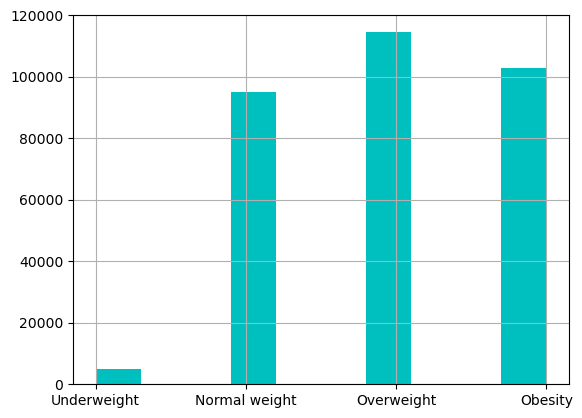

In [57]:
df.BMIStatus.hist(color='c')

<AxesSubplot:ylabel='Frequency'>

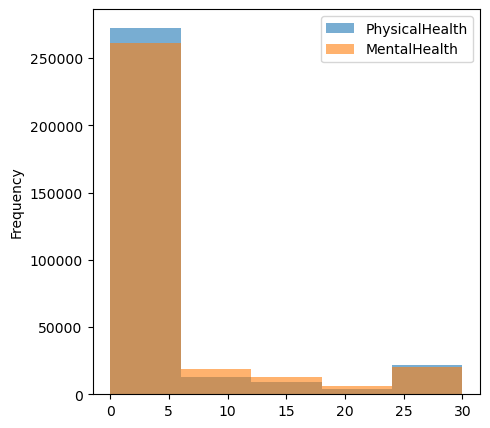

In [58]:
df[['PhysicalHealth','MentalHealth',]].plot.hist(bins=5, figsize=(5,5), alpha=0.6)

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

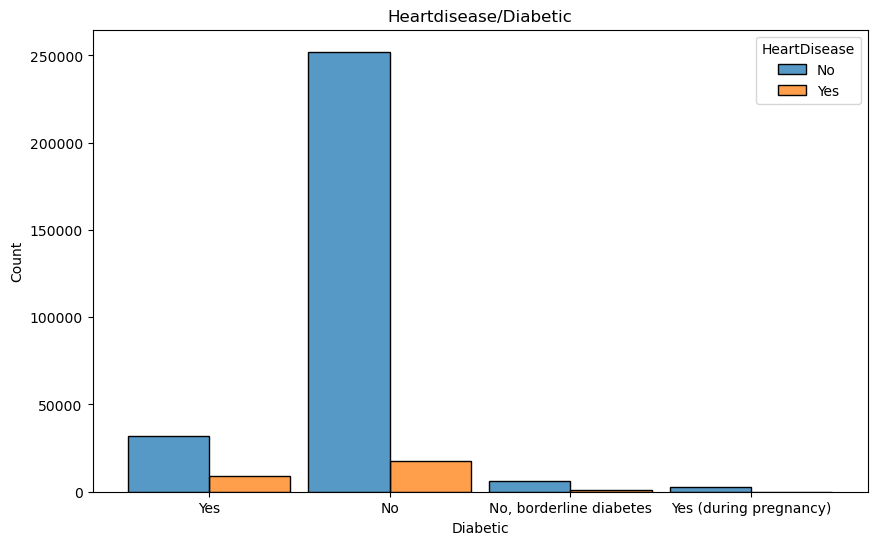

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,
             x='Diabetic',
             hue='HeartDisease',
             multiple='dodge',
             shrink=0.9)
plt.title('Heartdisease/Diabetic');
df.Diabetic.value_counts()

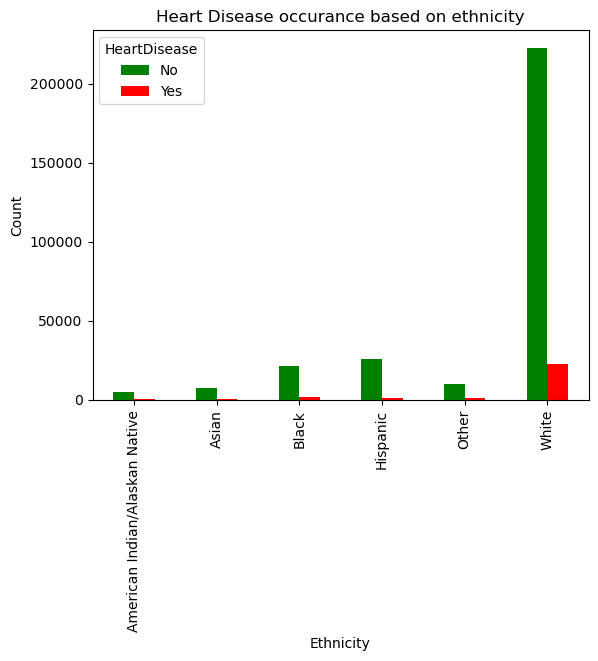

In [60]:
pd.crosstab(df['Race'], df['HeartDisease']).plot(kind ='bar',color='gr')
plt.title('Heart Disease occurance based on ethnicity')
plt.ylabel('Count')
plt.xlabel('Ethnicity')
plt.show()

In [61]:
def convert_age_interval_to_integer(age_interval):
    if "or" in age_interval:
        return int(int(age_interval.split('or')[0])/5)
    
    return int(int(age_interval.split('-')[0])/5)

# example conversion:
# 40-44 => 8
# 45-49 => 9
# 50-54 => 10
# 55-59 => 11

In [62]:
df['AgeWithCode'] = df['AgeCategory'].apply(convert_age_interval_to_integer)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIStatus,AgeWithCode
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,Underweight,11
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Normal weight,16
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,Overweight,13
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Normal weight,15
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Normal weight,8


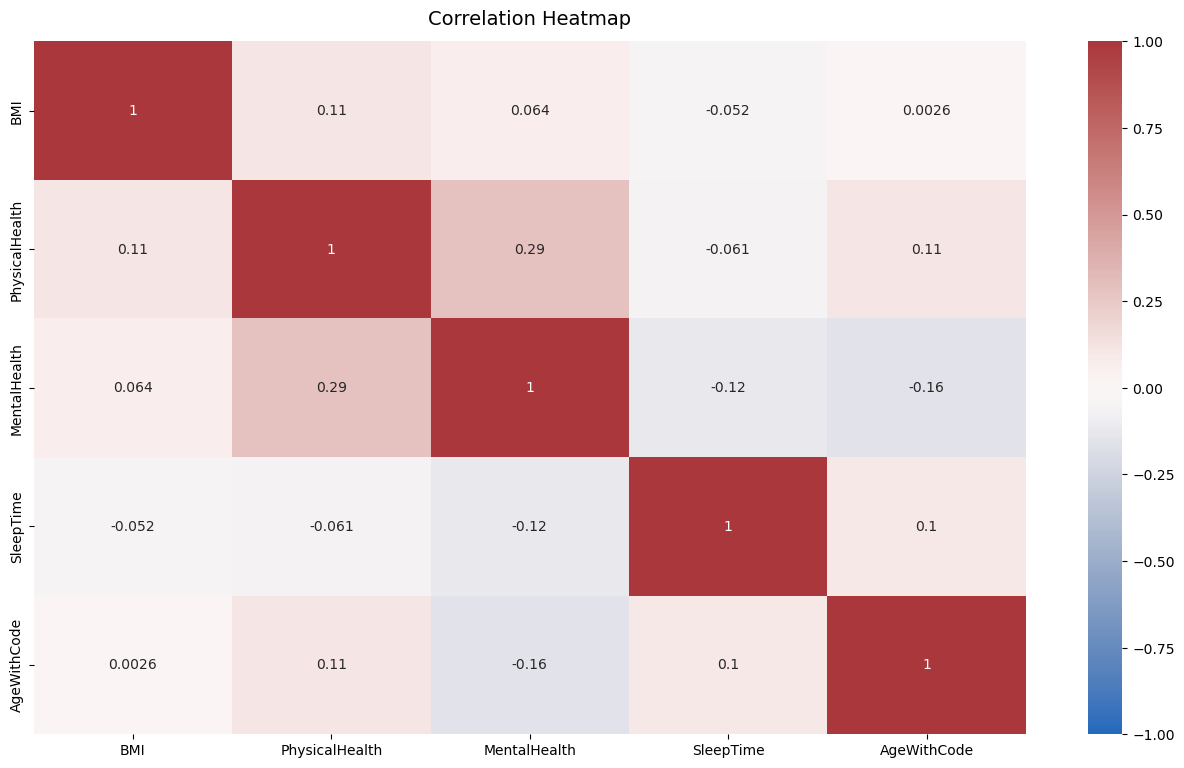

In [63]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Boxplot showing `BMI` distributions for `AgeWithCode`, comparing patients who had heart disease versus who did not have

<AxesSubplot:xlabel='BMI', ylabel='AgeWithCode'>

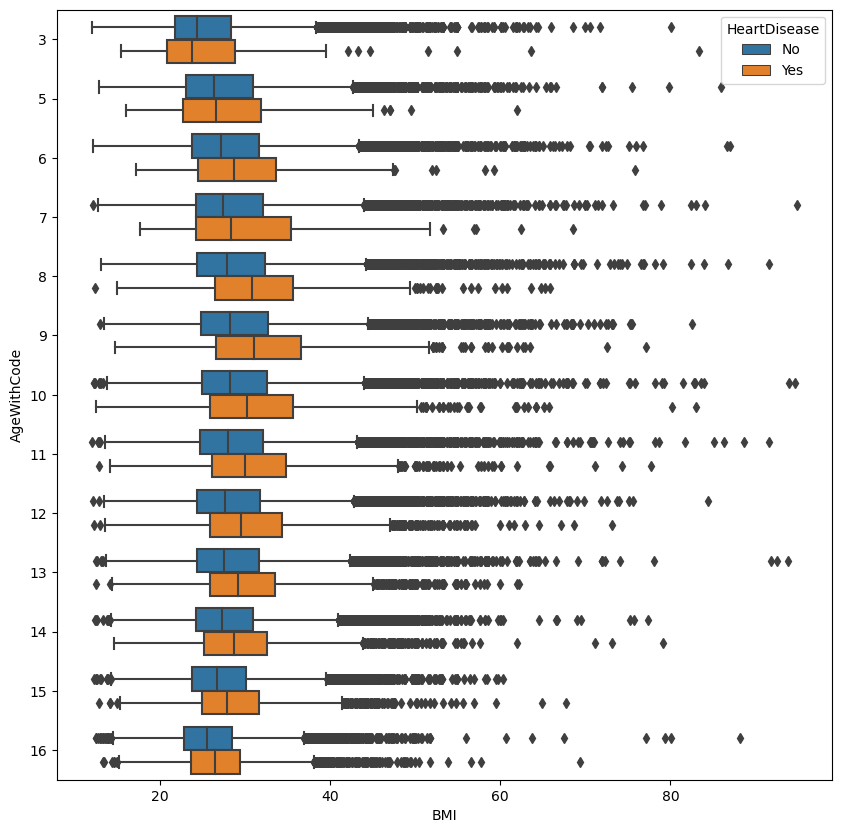

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='BMI', y='AgeWithCode', hue='HeartDisease', orient="h")

# Discovering correlations beween the factors using statistics

Examining the connections by creating hipotheses. Usually the base hipothesis is
that the variables have no connection and the alternate hipothesis is that they have. For example:

**$H_0$**: There is no connection between diabetes and heartdisease

**$H_A$**: There is a connection between diabetes and heartdisease

In [65]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [66]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [67]:
crosstab = pd.crosstab(df['HeartDisease'], df['Diabetic'])
crosstab

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
HeartDisease,,,,
No,252134,5992,31845,2451
Yes,17519,789,8957,108


Choose to use the chi2 test

In [68]:
stats.chi2_contingency(crosstab)

(10959.86127652373,
 0.0,
 3,
 array([[2.46571928e+05, 6.20057719e+03, 3.73095341e+04, 2.33996122e+03],
        [2.30810725e+04, 5.80422811e+02, 3.49246594e+03, 2.19038781e+02]]))

The first 3 values are Chi-square value, p-value and the degrees of freedom. Although, while we check the results of the chi2 test, we need also to check that the expected cell frequencies are greater than or equal to 5 (the numbers in the 
square brackets). It is one of the assumptions for the chi2 test. Since the result do not meet with the requirement, Fisher’s Exact test sohuld be implemented in this case. Although this method only works for 2x2 matrixes 
(in this case the 2 categoical variables can only have 2 possible values), so need to examine all the combinations of columns one by one.


In [69]:
my_table = np.array([[252134, 5992, 31845, 2451],
                     [17519, 789, 8957, 108]])

print(crosstab)
print('\n')

result_dict = {}

for i in range(my_table.shape[1] - 1):
    for j in range(i + 1, my_table.shape[1]):
        current_table = my_table[:, [i, j]]
        odds_ratio, p_value = fisher_exact(current_table)
        result_dict[f"Column {i+1} vs Column {j+1}"] = {'Odds Ratio': odds_ratio, 'p-value': p_value}

for comparison, result in result_dict.items():
    print(f"Comparison: {comparison}")
    print(f"Odds Ratio: {result['Odds Ratio']}")
    print(f"P-value: {result['p-value']}")
    print()

Diabetic          No  No, borderline diabetes    Yes  Yes (during pregnancy)
HeartDisease                                                                
No            252134                     5992  31845                    2451
Yes            17519                      789   8957                     108


Comparison: Column 1 vs Column 2
Odds Ratio: 1.895078915274212
P-value: 5.16795351586664e-53

Comparison: Column 1 vs Column 3
Odds Ratio: 4.048027201223361
P-value: 0.0

Comparison: Column 1 vs Column 4
Odds Ratio: 0.6341654030738301
P-value: 9.81507040734527e-07

Comparison: Column 2 vs Column 3
Odds Ratio: 2.1360731569522127
P-value: 3.168163436169584e-94

Comparison: Column 2 vs Column 4
Odds Ratio: 0.33463799209758416
P-value: 2.3938513743190866e-31

Comparison: Column 3 vs Column 4
Odds Ratio: 0.15666036109692588
P-value: 2.5706982567629484e-136



Relation between gender and heart disease

**$H_0$**: There is no connection between gender and heartdisease

**$H_A$**: There is a connection between gender and heartdisease

In [70]:
crosstab2 = pd.crosstab(df['HeartDisease'], df['Sex'])
crosstab2

Sex,Female,Male
HeartDisease,,
No,156571,135851
Yes,11234,16139


In [71]:
stats.chi2_contingency(crosstab2)

(1568.3069168517372,
 0.0,
 1,
 array([[153441.65390328, 138980.34609672],
        [ 14363.34609672,  13009.65390328]]))

Checking that the same decision will be made with Fisher’s Exact test 

In [72]:
odds_ratio, p_value = fisher_exact(crosstab2)

print("\nFisher's Exact Test Results:")
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)


Fisher's Exact Test Results:
Odds Ratio: 1.6557344606569355
P-value: 0.0


Since the p-value (0) smaller then 5, we reject the null hypothesis with both tests, meaning there is a connection between gender and heart disease.


(A p-value equal to 0 is an extremelly strong evidence against the null hypothesis. However, it's crucial to note that due to the nature of statistical calculations and rounding in computer systems, a reported p-value of exactly 0 most probably is a result of numerical limitations. In practice, a very small p-value, close to 0 (e.g., less than 0.001), is often considered highly significant and suggests strong evidence against the null hypothesis.)

Curious about non categorical values. The importance of enough and quality sleep 
is well documented in various areas of health. Can this affect the emergence of 
heart disease? Since sleeptime is given as numerical values, need to
perform a t-test.

In [73]:
sick = df[df["HeartDisease"] == "No"]["SleepTime"]
healthy = df[df["HeartDisease"] == "Yes"]["SleepTime"]

stats.ttest_ind(a=sick, b=healthy, equal_var=False)

Ttest_indResult(statistic=-3.8606587009234725, pvalue=0.00011331398017915288)

Since the p-value is extremely small (much smaller than the significance level 
of 5%),the null hypothesis can be rejected.

# Model building and evaluation

In this case there can only be 2 possible outcomes: 0 = no heart disease, 
1 = having a heart disease. Therefore the task will be binary classification.
2 approach will be used:

#### 1. approach: Logistic regression

Only works for numerical data, so need to alter the table

In [74]:
df_encoded = df.copy()
label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

df_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIStatus,AgeWithCode
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1,3,11
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0,0,16
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0,2,13
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1,0,15
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0,0,8


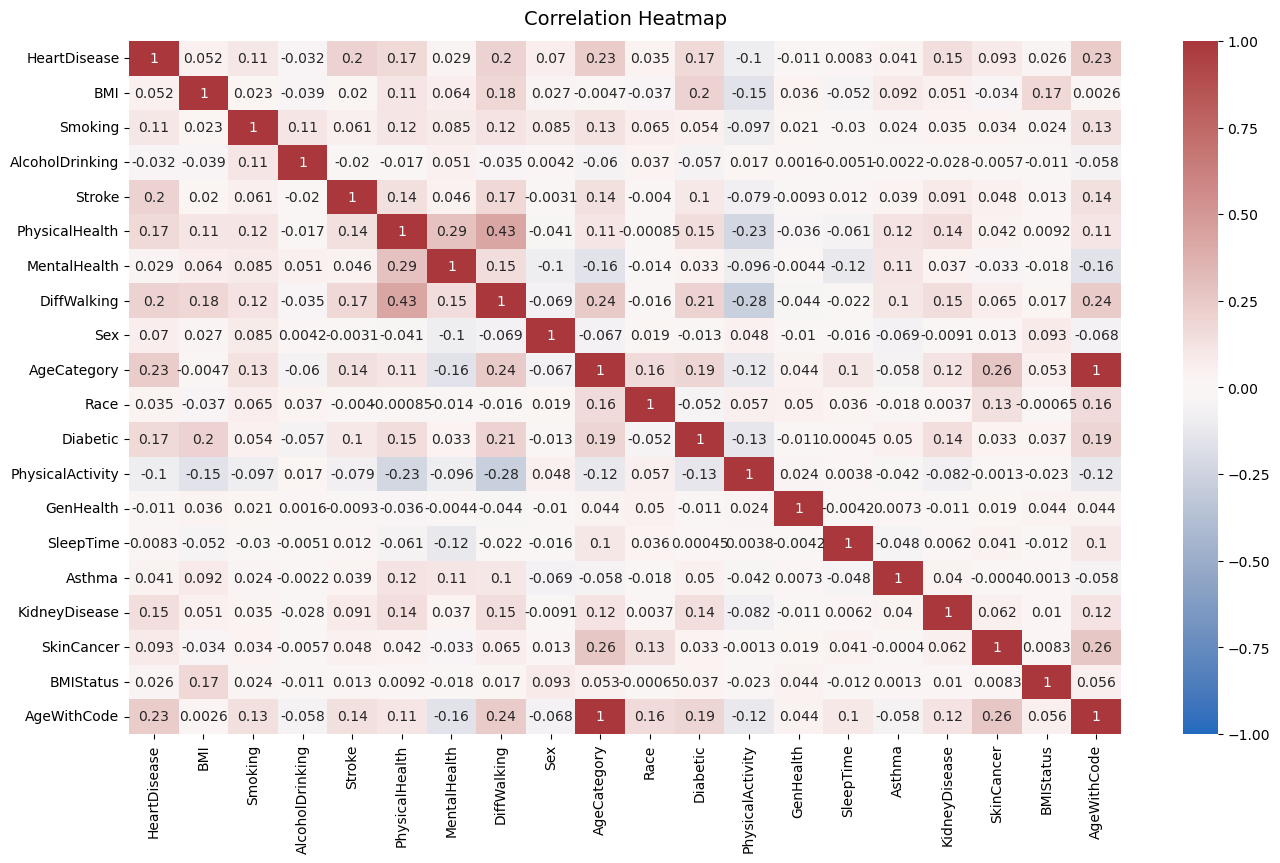

In [75]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [76]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [78]:
log_reg = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [79]:
y_pred = log_reg.predict(X_test)

Above the outcome variable has been isolated for training of the model. Also the 
table is fragmented into training and test set for the prediction. Below the
confusion matrix of the result.

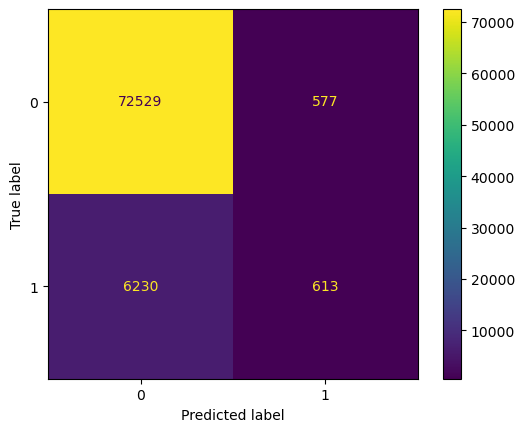

In [80]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_reg.classes_)

log_disp.plot(values_format='')
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who had heart diease that the model accurately predicted.

False positives: The number of people who had heart diease that the model inaccurately predicted.

False negatives: The number of people who had heart diease that the model inaccurately predicted

True positives: The number of people who had heart diease that the model accurately predicted


#### Evaluating metrics

Accuracy

Accuracy is the proportion of data points that are correctly classified. It is an overall representation of model performance, represented as:

Accuracy = (true positives + true negatives)/total prediction

Accuracy is often unsuitable to use when there is a class imbalance in the data, because it’s possible for a model to have high accuracy by predicting the majority class every time. In such a case, the model would score well, but it may not be a useful model. 

Precision

Precision measures the proportion of positive predictions that are true positives. It is represented as:

Precision = true postives/(true positives+false positives)

Precision is a good metric to use when it’s important to avoid false positives. For example, if your model is designed to initially screen out ineligible loan applicants before a human review, then it’s best to err on the side of caution and not automatically disqualify people before a person can review the case more carefully.

Recall

Recall measures the proportion of actual positives that are correctly classified. It is represented as:

Recall = true postives/(true positives+false negatives)

Recall is a good metric to use when it’s important that you identify as many true responders as possible. For example, if your model is identifying poisonous mushrooms, it’s better to identify all of the true occurrences of poisonous mushrooms, even if that means making a few more false positive predictions.

F1 score

F1 score is a measurement that combines both precision and recall into a single expression, giving each equal importance. It is calculated as:

F1 = 2 * ((precision * recall)/(precision * recall))

This combination is known as the harmonic mean. F1 score can range [0, 1], with zero being the worst and one being the best. The idea behind this metric is that it penalizes low values of either metric, which prevents one very strong factor—precision or recall—from “carrying” the other, when it is weaker.

AUC

AUC is a measure of the two-dimensional area underneath an ROC curve. AUC provides an aggregate measure of performance across all possible classification thresholds. One way to interpret AUC is to consider it as the probability that the model ranks a random positive sample more highly than a random negative sample. AUC ranges in value from 0.0 to 1.0.

In [81]:
target_names = ['Predicted would not have', 'Predicted would have']
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

Predicted would not have       0.92      0.99      0.96     73106
    Predicted would have       0.52      0.09      0.15      6843

                accuracy                           0.91     79949
               macro avg       0.72      0.54      0.55     79949
            weighted avg       0.89      0.91      0.89     79949



The overall metrics are not bad, but the results are significally worse in the
actual disease prediction.

In [82]:
df_encoded['HeartDisease'].value_counts(normalize=True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

The dataset is fairly imbalanced, so oversampling the minority class data:

In [83]:
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Class distribution after oversampling:

In [84]:
print(pd.Series(y_train_resampled).value_counts(normalize=True))

0    0.833334
1    0.166666
Name: HeartDisease, dtype: float64


Retain the model on oversampled data:

In [85]:
log_reg_2 = LogisticRegression(random_state=42, max_iter=600).fit(X_train_resampled, y_train_resampled)
y_pred_2 = log_reg_2.predict(X_test)
print('Results of the first try:')
print()
print(classification_report(y_test, y_pred, target_names=target_names))
print()
print('Results after the upscaling the minority class:')
print()
print(classification_report(y_test, y_pred_2, target_names=target_names))

Results of the first try:

                          precision    recall  f1-score   support

Predicted would not have       0.92      0.99      0.96     73106
    Predicted would have       0.52      0.09      0.15      6843

                accuracy                           0.91     79949
               macro avg       0.72      0.54      0.55     79949
            weighted avg       0.89      0.91      0.89     79949


Results after the upscaling the minority class:

                          precision    recall  f1-score   support

Predicted would not have       0.93      0.97      0.95     73106
    Predicted would have       0.39      0.19      0.25      6843

                accuracy                           0.91     79949
               macro avg       0.66      0.58      0.60     79949
            weighted avg       0.88      0.91      0.89     79949



#### 2. approach: Tree-based model

In [87]:
tree = DecisionTreeClassifier(random_state=0)
# Dictionary of possible hyperparameter values
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Cross-validation grid-search exhuastively search for the best model parameters. Below fit the model on the training data.

In [88]:
%%time
tree1.fit(X_train_resampled, y_train_resampled)

Wall time: 1min 51s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'accuracy', 'f1', 'recall', 'roc_auc'})

Check the best parameters

In [89]:
tree1.best_params_ 

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

Check the best AUC score

In [90]:
tree1.best_score_

0.8174367325148237

This model is way more succesfull on predicting a heart disease, since this AUC value is strong.

Extracting the scores from the grid search:

In [91]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

CV scores:

In [92]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.525609,0.182227,0.269916,0.835792,0.817437


#### Boosting the results with random tree method

In [93]:
rf = RandomForestClassifier(random_state=0)

# Dictionary of possible hyperparameter values
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

# Instantiate GridSearch
rf_val = GridSearchCV(rf, cv_params, refit='auc', n_jobs = -1, verbose = 1)
rf_val.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='auc', verbose=1)

In [94]:
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [95]:
rf_val.best_score_

0.8480236140832925

In [96]:
rf_opt = RandomForestClassifier(max_depth = 50, max_features="sqrt", max_samples = 0.9,
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                n_estimators = 100, )
rf_opt.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=50, max_features='sqrt', max_samples=0.9,
                       min_samples_split=0.001)

In [97]:
y_pred = rf_opt.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

Predicted would not have       0.92      0.98      0.95     73106
    Predicted would have       0.43      0.13      0.20      6843

                accuracy                           0.91     79949
               macro avg       0.68      0.56      0.58     79949
            weighted avg       0.88      0.91      0.89     79949



#### Feature engineering

The dataset contains 3 columns, PhysicalHealth, MentalHealth and DiffWalking, that are way less absolute than the other columns. If we exclude these columns, can we improve the model?

In [100]:
df_fe = df_encoded.drop(['PhysicalHealth','MentalHealth','DiffWalking'], axis=1)
df_fe.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIStatus,AgeWithCode
0,0,16.60,1,0,0,0,7,5,2,1,4,5.0,1,0,1,3,11
1,0,20.34,0,0,1,0,12,5,0,1,4,7.0,0,0,0,0,16
2,0,26.58,1,0,0,1,9,5,2,1,1,8.0,1,0,0,2,13
3,0,24.21,0,0,0,0,11,5,0,0,2,6.0,0,0,1,0,15
4,0,23.71,0,0,0,0,4,5,0,1,4,8.0,0,0,0,0,8


In [101]:
y2 = df_fe['HeartDisease']
x2 = df_fe.drop('HeartDisease', axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, stratify=y, random_state=0)

In [102]:
tree_ = DecisionTreeClassifier(random_state=0)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree2 = GridSearchCV(tree_, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [103]:
%%time
tree2.fit(X_train2, y_train2)

Wall time: 1min 23s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'accuracy', 'f1', 'recall', 'roc_auc'})

In [104]:
tree2.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [105]:
tree2.best_score_

0.8258344407124693

In [106]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.525609  0.182227  0.269916  0.835792  0.817437
               model  precision   recall        F1  accuracy       auc
0  decision tree2 cv   0.532585  0.06079  0.109038  0.915054  0.825834


Beside the AUC score every metric were improved a bit.

In [107]:
rf = RandomForestClassifier(random_state=0)


rf_val_2 = GridSearchCV(rf, cv_params, refit='auc', n_jobs = -1, verbose = 1)
rf_val_2.fit(X_train2, y_train2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='auc', verbose=1)

In [108]:
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [109]:
rf_val.best_score_

0.8480236140832925

In [110]:
rf_opt = RandomForestClassifier(max_depth = 50, max_features="sqrt", max_samples = 0.9,
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                n_estimators = 100, )
rf_opt.fit(X_train2, y_train2)
y_pred_rt2 = rf_opt.predict(X_test2)

In [111]:
print(classification_report(y_test2, y_pred_rt2, target_names=target_names))

                          precision    recall  f1-score   support

Predicted would not have       0.92      1.00      0.96     73106
    Predicted would have       0.61      0.03      0.06      6843

                accuracy                           0.92     79949
               macro avg       0.76      0.51      0.51     79949
            weighted avg       0.89      0.92      0.88     79949



#### Importance

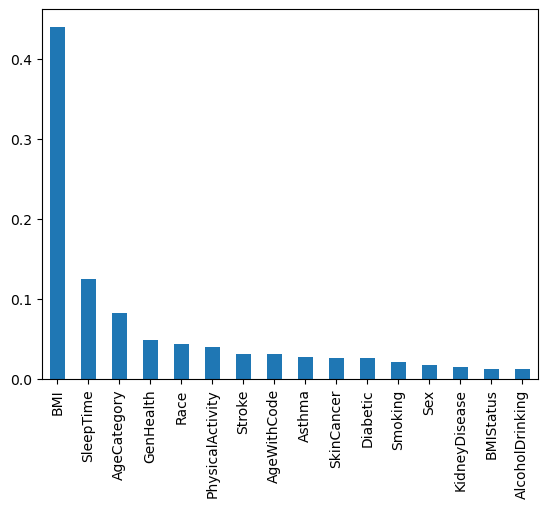

In [112]:
# Had to fit the decission before importance classification
tree_.fit(X_train2, y_train2)
importances = tree_.feature_importances_
forest_importances = pd.Series(importances, index=x2.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

We can see, that by far the most important suspect of the cause of heart disease is the BMI value of the patient. After that 
(a bit surpriseingly) comes the 'Sleeptime'. It can be because these are the numerical and most wideranged attributes, while it is harder to the categorical attributes to gain importance.